In [1]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the packages 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

/Users/sanyamsinghchauhan/anaconda3/lib/python3.11/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
data = yf.download(["BAC","BK","BBWI","BAX","BDX"], start="2018-01-01", end="2022-12-31")
data.tail()

[*********************100%%**********************]  5 of 5 completed


Price       Adj Close                                                   Close  \
Ticker            BAC        BAX       BBWI         BDX         BK        BAC   
Date                                                                            
2022-12-23  31.489534  48.727364  41.033516  250.684769  42.747772  32.470001   
2022-12-27  31.547716  49.378101  41.043301  251.502426  42.910522  32.529999   
2022-12-28  31.780474  48.911903  39.869236  249.354813  42.728622  32.770000   
2022-12-29  32.139301  49.650051  40.749783  253.078583  43.714733  33.139999   
2022-12-30  32.119904  49.504364  41.229191  250.517273  43.580700  33.119999   

Price                                                    ...       Open  \
Ticker            BAX       BBWI         BDX         BK  ...        BAC   
Date                                                     ...              
2022-12-23  50.169998  41.939999  254.470001  44.650002  ...  32.400002   
2022-12-27  50.840000  41.950001  255.300003  44.820000  ...  32.500000   
2022-12-28  50.360001  40.750000  253.119995  44.630001  ...  32.570000   
2022-12-29  51.119999  41.650002  256.899994  45.660000  ...  32.889999   
2022-12-30  50.970001  42.139999  254.300003  45.520000  ...  33.099998   

Price                                                      Volume           \
Ticker            BAX       BBWI         BDX         BK       BAC      BAX   
Date                                                                         
2022-12-23  49.959999  40.330002  253.509995  44.439999  21378600  1837000   
2022-12-27  50.150002  41.939999  254.679993  44.810001  22776100  2643200   
2022-12-28  51.060001  41.779999  256.339996  44.820000  30541000  2247900   
2022-12-29  50.720001  41.349998  255.250000  44.910000  22252900  2884900   
2022-12-30  50.810001  41.099998  255.809998  45.320000  28198900  1823000   

Price                                 
Ticker         BBWI     BDX       BK  
Date                                  
2022-12-23  2461500  619400  2273400  
2022-12-27  3022500  558100  2109600  
2022-12-28  2138000  513000  2013100  
2022-12-29  1610500  643900  3088400  
2022-12-30  2237000  639900  3116100  

[5 rows x 30 columns]

In [4]:
data = data[['Adj Close']]

Importing stocks prices from yfinance

In [4]:
stocks = ('BAC','BK','BBWI','BAX','BDX')
stock_prices = yf.download(stocks, start="2018-01-01", end="2022-12-31")
stock_prices

[*********************100%%**********************]  5 of 5 completed


Price       Adj Close                                                   Close  \
Ticker            BAC        BAX       BBWI         BDX         BK        BAC   
Date                                                                            
2009-09-01  13.377919  23.070349   5.563752   52.187016  20.265556  16.459999   
2009-09-02  13.231530  22.872818   5.552435   52.232883  20.157377  16.270000   
2009-09-03  13.695088  23.206160   5.857972   52.737316  20.301609  16.840000   
2009-09-04  13.898396  23.300808   5.793847   53.989159  20.258339  17.090000   
2009-09-08  13.841469  22.986599   5.835338   53.128994  20.561243  17.020000   
...               ...        ...        ...         ...        ...        ...   
2023-08-25  28.040659  40.914455  34.625603  277.918793  42.958366  28.500000   
2023-08-28  28.296471  41.032677  35.619446  279.447296  43.469189  28.760000   
2023-08-29  28.699860  41.702599  36.851818  279.367889  43.557602  29.170000   
2023-08-30  28.571957  41.347935  37.875477  278.206604  43.704960  29.040001   
2023-08-31  28.442986  40.276535  36.643108  277.363007  44.078251  28.670000   

Price                                                    ...       Open  \
Ticker            BAX       BBWI         BDX         BK  ...        BAC   
Date                                                     ...              
2009-09-01  30.450842  11.924010   66.614632  28.100000  ...  17.700001   
2009-09-02  30.190113  11.899757   66.673172  27.950001  ...  16.150000   
2009-09-03  30.630093  12.554568   67.317070  28.150000  ...  16.590000   
2009-09-04  30.755024  12.417138   68.585365  28.090000  ...  17.070000   
2009-09-08  30.200977  12.506063   67.492683  28.510000  ...  17.459999   
...               ...        ...         ...        ...  ...        ...   
2023-08-25  41.529999  34.840000  280.010010  43.730000  ...  28.639999   
2023-08-28  41.650002  35.840000  281.549988  44.250000  ...  28.690001   
2023-08-29  42.330002  37.080002  281.470001  44.340000  ...  28.889999   
2023-08-30  41.970001  38.110001  280.299988  44.490002  ...  29.219999   
2023-08-31  40.599998  36.869999  279.450012  44.869999  ...  28.930000   

Price                                                       Volume           \
Ticker            BAX       BBWI         BDX         BK        BAC      BAX   
Date                                                                          
2009-09-01  30.592070  11.964430   67.834145  29.450001  334738300  5854932   
2009-09-02  30.298752  11.843169   66.351219  27.990000  229078300  5870029   
2009-09-03  30.325911  12.101859   66.995125  28.049999  176555400  5334482   
2009-09-04  30.695274  12.538399   67.356094  28.320000  173567100  5657393   
2009-09-08  30.879957  12.554568   68.380486  28.450001  163026500  6234731   
...               ...        ...         ...        ...        ...      ...   
2023-08-25  41.490002  34.720001  277.779999  43.689999   34253200  3903000   
2023-08-28  41.849998  34.919998  281.309998  43.980000   33075200  2453600   
2023-08-29  41.849998  36.060001  282.119995  44.369999   30428200  2348300   
2023-08-30  42.400002  37.000000  282.200012  44.389999   33366400  2088200   
2023-08-31  41.820000  38.040001  280.799988  44.669998   37243000  3672500   

Price                                   
Ticker         BBWI      BDX        BK  
Date                                    
2009-09-01  6561790  2484908  14095800  
2009-09-02  5139735  2202315   7264200  
2009-09-03  7373015  1181825   6792500  
2009-09-04  5805612  1879953   6923500  
2009-09-08  7134274  2246595   6840300  
...             ...      ...       ...  
2023-08-25  3979000  1343000   2951500  
2023-08-28  4715400   838500   1996300  
2023-08-29  3850700   878200   2571200  
2023-08-30  3178000   931900   2849100  
2023-08-31  5739500  1103300   5077200  

[3524 rows x 30 columns]

In [5]:
stock_prices = stock_prices[['Adj Close']]
stock_prices.columns = ['BAC','BK','BBWI','BAX','BDX']

Changing the names of the column and calculating the daily precentage change

In [6]:
returns = stock_prices.pct_change().dropna() #calculate daily returns #drop the missing NA values from the first day
returns.columns = ['rBAC','rBK','rBBWI','rBAX','rBDX'] #rename the columns
returns.head()

,rBAC,rBK,rBBWI,rBAX,rBDX
Date,,,,,
2009-09-02,-0.010943,-0.008562,-0.002034,0.000879,-0.005338
2009-09-03,0.035034,0.014574,0.055028,0.009657,0.007155
2009-09-04,0.014845,0.004079,-0.010947,0.023737,-0.002131
2009-09-08,-0.004096,-0.013485,0.007161,-0.015932,0.014952
2009-09-09,0.001175,0.003957,0.016807,0.016912,0.021396


In [7]:
mu = expected_returns.mean_historical_return(stock_prices)
mu

BAC     0.055437
BK      0.040663
BBWI    0.144343
BAX     0.126922
BDX     0.057156
dtype: float64

We find the covarience of all the assets in compare to the other assets and measure their covarience

In [8]:
cov_matrix = risk_models.sample_cov(stock_prices)
cov_matrix

,BAC,BK,BBWI,BAX,BDX
BAC,0.118828,0.030368,0.060321,0.025004,0.071830
BK,0.030368,0.053532,0.022729,0.025792,0.025730
BBWI,0.060321,0.022729,0.199548,0.019457,0.049176
BAX,0.025004,0.025792,0.019457,0.041297,0.021963
BDX,0.071830,0.025730,0.049176,0.021963,0.077468


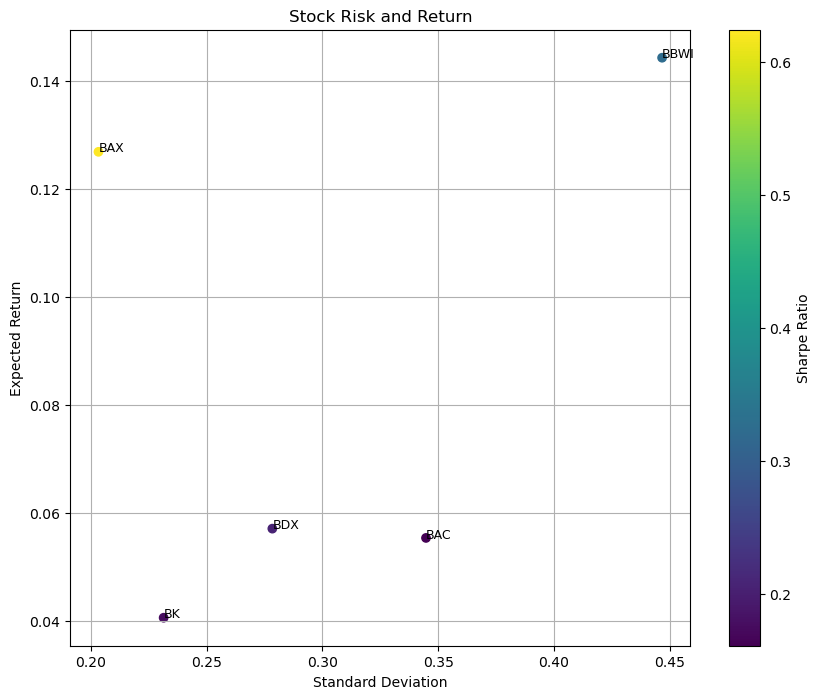

In [9]:
plt.figure(figsize=(10, 8))

stds = np.sqrt(np.diagonal(cov_matrix))

plt.scatter(stds, mu, c=mu/stds, marker='o', cmap='viridis')

for i, txt in enumerate(stock_prices):
    plt.text(stds[i], mu[i], txt, fontsize=9)

plt.grid(True)
plt.title('Stock Risk and Return')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')

plt.show()

After plotting the graph of expected returns, standard deviation and sharp ratio we can say that BAX has the best expected returns with the lowest standard deviation. In compare to the other assets the BBWI has the highest risk in all the stocks.
The other stocks are neither high risk or high rewards stocks.

This line creates a NumPy array representing the weights assigned to each asset in the portfolio. In this case, each asset is assigned a weight of 0.2, indicating that the portfolio is equally weighted.

In [10]:
EQweights = np.array([0.2, 0.2,0.2,0.2,0.2])  # Equally weighted, as there are five assets in the portfolio
EQportfolio_returns = returns.dot(EQweights)

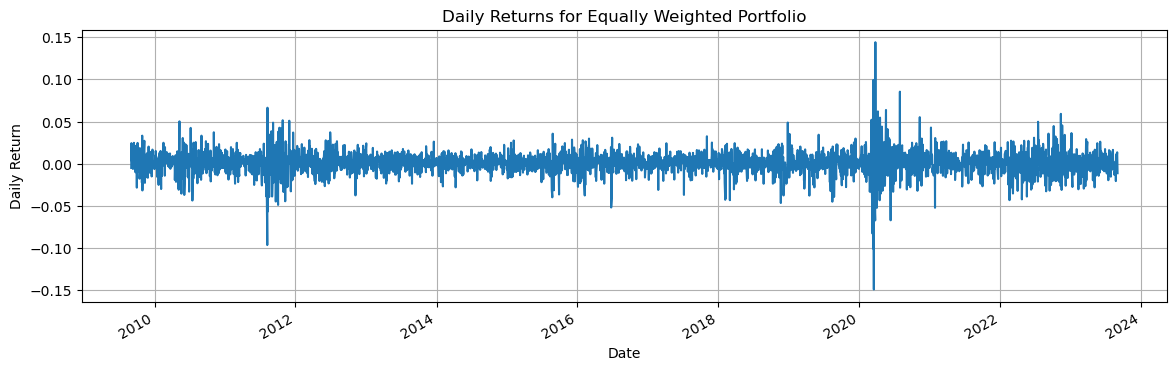

In [11]:
EQportfolio_returns.plot(figsize=(14, 4))
plt.title('Daily Returns for Equally Weighted Portfolio')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.grid(True)
plt.show()

Annual EQ annual return for the given assets

In [12]:
EQannual_expected_return = EQportfolio_returns.mean() * 252
EQannual_expected_return

0.12965307539970886

volatility indicates how much the price of an asset tends to fluctuate.

In [13]:
vol_EQportfolio = EQportfolio_returns.std() * np.sqrt(250)
vol_EQportfolio

0.21780042999726468

In [14]:
rfr = 0.00
sharpe_ratio = ((EQannual_expected_return - rfr) / vol_EQportfolio)
print (sharpe_ratio)

0.5952838357634884


In [15]:
ef = EfficientFrontier(mu, cov_matrix)
weights = ef.max_sharpe()
weights = pd.Series(weights)
perf_max_sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 12.9%
Annual volatility: 19.8%
Sharpe Ratio: 0.55


In [16]:
keys = ['Average Annual Return', 'Annual Risk', 'Sharpe Ratio']
results = dict(zip(keys, perf_max_sharpe))
perf_max_sharpe = pd.DataFrame(results, index=['Optimal Portfolio'])
display(perf_max_sharpe)

,Average Annual Return,Annual Risk,Sharpe Ratio
Optimal Portfolio,0.129344,0.197806,0.552785


In [17]:
weights

BAC     0.000000
BK      0.000000
BBWI    0.139024
BAX     0.860976
BDX     0.000000
dtype: float64

In [18]:
portfolio_returns = (returns * weights.values).sum(axis=1).round(6)

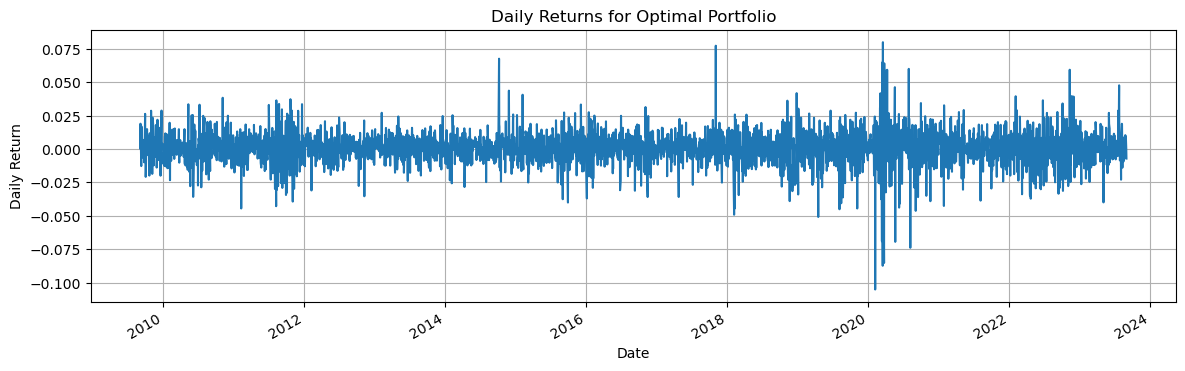

In [19]:
portfolio_returns.plot(figsize=(14, 4))
plt.title('Daily Returns for Optimal Portfolio')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [20]:
cumulative_returns = (1 + portfolio_returns).cumprod()
initial_investment = 100000  # Replace with your initial investment amount
daily_portfolio_value = initial_investment * cumulative_returns
daily_portfolio_value 

Date
2009-09-02    100047.400000
2009-09-03    101644.656741
2009-09-04    103567.265423
2009-09-08    102249.682673
2009-09-09    103977.497810
                  ...      
2023-08-25    642406.353868
2023-08-28    648011.991712
2023-08-29    650970.166454
2023-08-30    651154.391012
2023-08-31    646509.055586
Length: 3523, dtype: float64

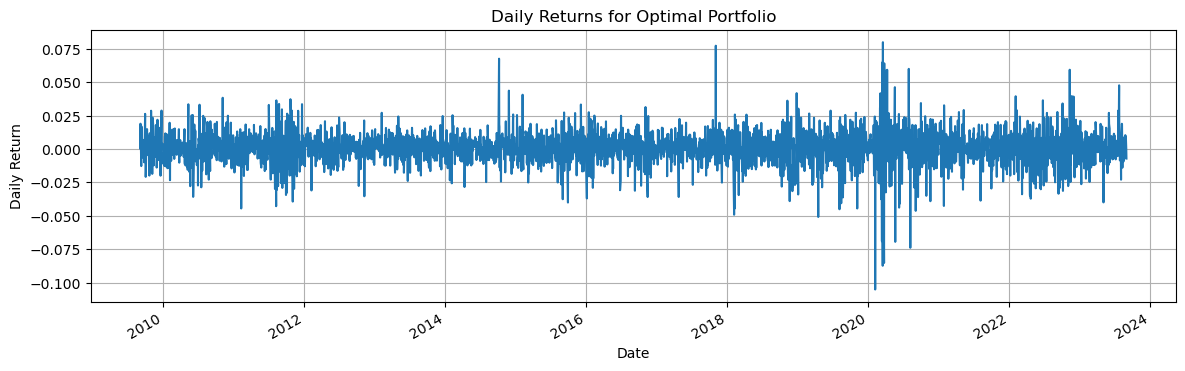

In [21]:
portfolio_returns.plot(figsize=(14, 4))
plt.title('Daily Returns for Optimal Portfolio')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.grid(True)
plt.show()